# Wstęp do Machine Learning - praca wspólna

## Zbior diabetes
https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Wczytanie pakietów

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score 

### Eksploracja

#### Wczytanie zbioru danych

In [2]:
df = pd.read_csv("diabetes.csv")

#### Przegląd danych w zbiorze
##### Metody
1. head
2. info
3. shape
4. describe
5. value_counts

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

#### Sprawdzenie udziału poszczególnych kategorii


### Wykresy
1. Pudełko
2. Histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbe77a76a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbe77a7d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbe77a7250>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbe77b3460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbe77b37f0>],
 'means': []}

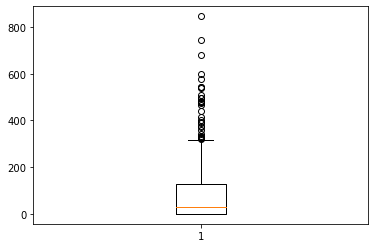

In [8]:
plt.boxplot(df["Insulin"])

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

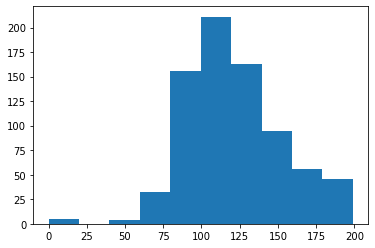

In [9]:
plt.hist(df["Glucose"])


#### Sprawdzenie braków danych

In [10]:
pd.Series([np.nan]).sum()

0.0

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Korelacja

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

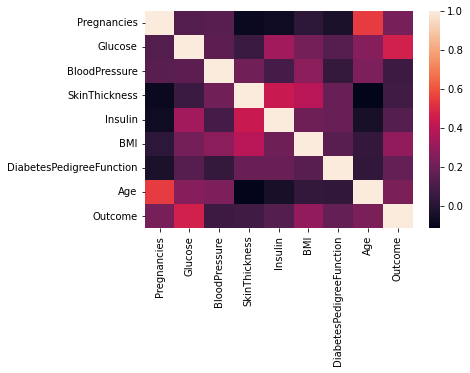

In [13]:
sns.heatmap(df.corr())

### Feature Engineering

#### Stworzenie zmiennych 0-1 dla kategorii


In [14]:
#nie jest to możliwe w przypadku podanych danych

#### Zbadanie zależności zmiennych 0-1 na target

In [15]:
#nie jest to możliwe w przypadku podanych danych

#### Sprawdź inne dwie zmienne kateogoryczne w podobny sposób

In [16]:
#nie jest to możliwe w przypadku podanych danych

#### Wytypowanie zmiennych na podstawie korelacji i analizy zmiennych 0-1

In [17]:
#nie jest to możliwe w przypadku podanych danych

### Przygotowanie zbioru
#### Podział zbioru na treningowy i testowy

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']], df[["Outcome"]], test_size = 0.2)

#### Standaryzacja

In [20]:
Scalerx = StandardScaler().fit(X_train)
X_train_scaled = Scalerx.transform(X_train)
X_test_scaled = Scalerx.transform(X_test)

#### Analiza głównych składowych

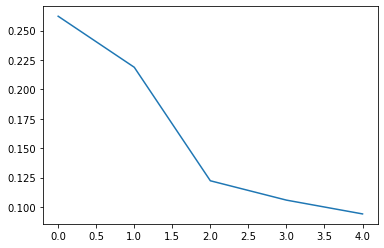

In [21]:
PCA_result = PCA(n_components=5)
PCA_result.fit(X_train_scaled)
X_train_PCA = PCA_result.transform(X_train_scaled)
plt.plot(PCA_result.explained_variance_ratio_)

### Estymacja modelu klasyfikacyjnego

Użyj wybranego modelu klasyfikacyjnego znanego Ci z zajęć. Wyestymuj dwa modele - jeden na wystandaryzowanych danych, a drugi na PCA.  

In [22]:
#ustandaryzowane dane
xgb_cl = xgb.XGBClassifier(n_estimators=50)
xgb_cl.fit(X_train, Y_train)

[19:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\siedl\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\siedl\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siedl\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
#PCA
xgb_cl.fit(X_train_scaled, Y_train)

[19:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Ocena jakości modelu klasyfikacyjnego

Wyznacz accuracy, precision, lub inne miary znane Ci z zajęć, które uznasz za stosowne. Porównaj wyniki dla obydwu modeli na odpowiednich zbiorach (Dane wystandaryzowane, dane PCA)

In [33]:
xgb_cl.score(X_test, Y_test)

0.38311688311688313

In [25]:
xgb_cl.score(X_test_scaled, Y_test)

0.7597402597402597

In [44]:
y_pred = xgb_cl.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
acc

0.38311688311688313

In [45]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        96
           1       0.38      1.00      0.55        58

    accuracy                           0.38       154
   macro avg       0.69      0.51      0.29       154
weighted avg       0.77      0.38      0.22       154

